In [7]:
import sys
from pathlib import Path

In [8]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [9]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

In [10]:
import yolov1
from yolov1.config import parse_config

In [11]:
from yolov1.data.dataset import YOLODataset
from yolov1.utils.vis import draw_boxes_numpy,  draw_boxes_tensor
from yolov1.utils.general import decode_labels

## config

In [12]:
import pprint

In [13]:
def load_config():
    config_path = "../yolov1/src/yolov1/configs/default.yaml"
    config = parse_config(config_file=config_path)
    pprint.pp(config.dict())
    return config

In [14]:
config = load_config()

{'data': {'root': '/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data',
          'train': 'train',
          'val': 'valid',
          'names': ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck'],
          'augmentations': {'apply': True,
                            'horizontal_flip': 0.5,
                            'color_jitter': 1.0,
                            'shift_scale_rotate': 0.9,
                            'random_crop': 1.0,
                            'random_crop_dims': (448.0, 448.0),
                            'gaussian_noise': 0.2}},
 'training': {'epochs': 150,
              'dls_kwargs': {'pin_memory': True,
                             'batch_size': 32,
                             'drop_last': True,
                             'num_workers': 2},
              'optim_kwargs': {'lr': 0.001,
                               'weight_decay': 0.0005,
                               'momentum': 0.9},
              'checkpoints_dir': '/home/ajkdrag/workspa

## dataset

In [172]:
S, B, C = config.model.S, config.model.B, config.model.nc

In [212]:
train_ds = YOLODataset(config, mode="train", encode=True)

Reloading 'yolov1.utils.general'.
2024-05-12T16:27:32.396094Z [info     ] Loaded 878 samples             func_name=get_data lineno=64


In [213]:
val_ds = YOLODataset(config, mode="valid", encode=True)

2024-05-12T16:27:32.902862Z [info     ] Loaded 250 samples             func_name=get_data lineno=64


In [234]:
first = train_ds[-10]

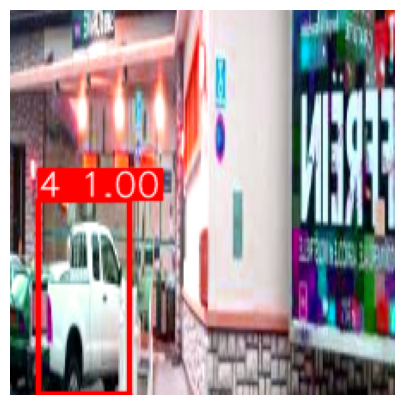

In [235]:
draw_boxes_tensor(first[0], decode_labels(first[1], S, B, C))

In [129]:
len(train_ds[2])

2

In [142]:
sample = train_ds[4]

In [143]:
sample[0].shape

torch.Size([3, 224, 224])

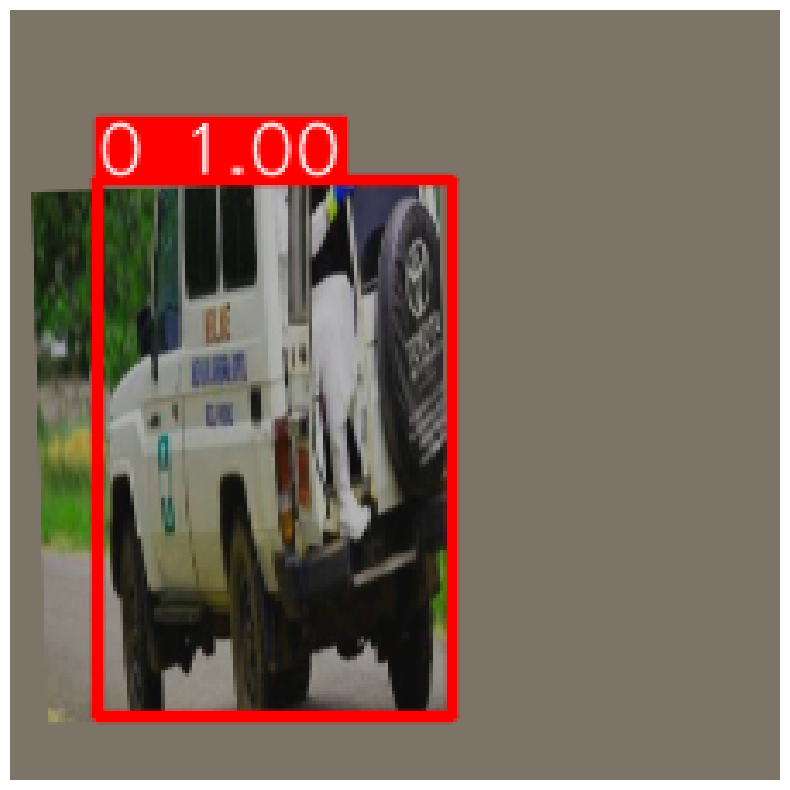

In [144]:
draw_boxes_tensor(
    sample[0],
    decode_labels(sample[1], config.model.S, config.model.B, config.model.nc))

In [95]:
val_ds = YOLODataset(config, mode="val")

2024-05-11T08:33:55.334059Z [info     ] Loaded 250 samples             func_name=get_data lineno=65


## dataloader

In [124]:
train_dataloader = torch.utils.data.DataLoader(
        train_ds,
        batch_size=config.training.batch_size,
        shuffle=True,
        num_workers=config.training.num_workers,
    )
# val_dataloader = torch.utils.data.DataLoader(
#     val_ds,
#     batch_size=config.training.batch_size,
#     shuffle=False,
#     num_workers=config.training.num_workers
# )

Reloading 'yolov1.data.dataset'.


## arch

In [15]:
from yolov1.models.arch import YOLOv2

In [18]:
model = YOLOv2(config.model)

Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.


In [21]:
model.backbone.feature_info[-1]

{'num_chs': 512, 'reduction': 32, 'module': 'layer4'}

In [17]:
# model = YOLOv1(config.model)

## train

In [9]:
config = load_config()

{'data': {'root': '/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data',
          'train': 'train',
          'val': 'valid',
          'names': ['Ambulance', 'Bus', 'Car', 'Motorcycle', 'Truck'],
          'augmentations': {'apply': True,
                            'horizontal_flip': 0.5,
                            'color_jitter': 1.0,
                            'shift_scale_rotate': 0.9,
                            'random_crop': 1.0,
                            'random_crop_dims': (448.0, 448.0),
                            'gaussian_noise': 0.2}},
 'training': {'epochs': 150,
              'dls_kwargs': {'pin_memory': True,
                             'batch_size': 32,
                             'drop_last': True,
                             'num_workers': 2},
              'optim_kwargs': {'lr': 0.001,
                               'weight_decay': 0.0005,
                               'momentum': 0.9},
              'checkpoints_dir': '/home/ajkdrag/workspa

In [10]:
from yolov1.train import main

In [11]:
main(config)

2024-05-12T17:31:47.396280Z [info     ] Loaded 878 samples             func_name=get_data lineno=64
2024-05-12T17:31:47.498283Z [info     ] Loaded 250 samples             func_name=get_data lineno=64


/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.venv/lib/python3.9/site-packages/pydantic/main.py:347: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


Loading pretrained weights from Hugging Face hub (timm/resnet50.a1_in1k)
[timm/resnet50.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2024-05-12T17:31:48.238146Z [info     ] Loaded model successfully with 26681940 trainable params func_name=main lineno=68
2024-05-12T17:35:23.947121Z [info     ] [1/150] Train Loss: {'total': 16.45393830758554, 'coord': 109.99566593876591, 'obj': 17.668072594536675, 'noobj': 166.8914469966182, 'class': 231.9708410192419} func_name=main lineno=91
2024-05-12T17:38:54.606093Z [info     ] [2/150] Train Loss: {'total': 11.862590048048231, 'coord': 95.25550785771122, 'obj': 29.178375244140625, 'noobj': 65.58658840038159, 'class': 189.58241158944588} func_name=main lineno=91
2024-05-12T17:42:28.503759Z [info     ] [3/150] Train Loss: {'total': 10.386686007181803, 'coord': 85.57505897239402, 'obj': 39.11409823099772, 'noobj': 33.768488778008354, 'class': 173.9163072374132} func_name=main 

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.9/multiprocessing/queues.py", line 251, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.9/multiprocessing/connection.py", line 205, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.9/multiprocessing/connection.py", line 416, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.9/multiprocessing/connection.py", line 373, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
  File "/usr/lib/python3.9/multiprocessing/queues.py", line 251, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.9/multiprocessing/connection.py", line 205, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.9/multiprocessing/connection.py", line 416, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.9/multiprocessing/connection.py", line 373, in _send
    n = write(self._handle, b

KeyboardInterrupt: 

## infer

In [15]:
from yolov1.detect import main as detect_main
from yolov1.data.dataset import InferenceDataset
from yolov1.data.utils import get_dls_for_inference

In [24]:
config.inference.source = '/home/ajkdrag/workspace/projects/architectures-impl-pytorch/.data/test/images'

In [17]:
config.inference.checkpoint = '/home/ajkdrag/workspace/projects/architectures-impl-pytorch/checkpoints/epoch_50.pt'

In [18]:
config.inference.conf_th = 0.5

In [25]:
for idx, res in enumerate(detect_main(config)):
    if idx == 7:
        break

Loading pretrained weights from Hugging Face hub (timm/resnet50.a1_in1k)
[timm/resnet50.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
2024-05-13T07:51:25.825670Z [info     ] Model loaded successfully      func_name=main lineno=65


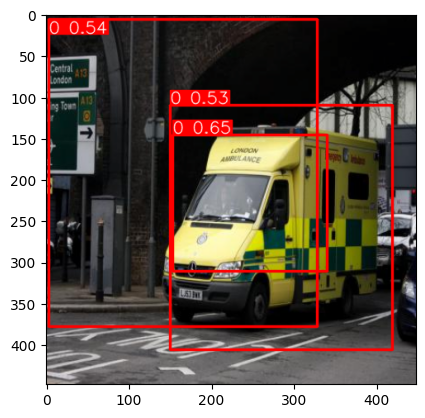

In [30]:
plt.imshow(res["drawn"][3])